In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

##### _Los siguientes datos fueron tomados del SNIIM (Sistema Nacional de Información e Integración de Mercados) el cual realizó un sondeo en 57 ciudades, 384 tortillerias y 120 supermercados en la república mexicana._

In [33]:
df_precio_tortilla = pd.read_csv("precio_tortillas.csv")
df_precio_tortilla

,Estado,Ciudad,Año,Mes,Día,Establecimiento,Precio
0,Aguascalientes,Aguascalientes,2007,1,10,Tortillería,9.9
1,Baja California,Mexicali,2007,1,10,Tortillería,NaN
2,Baja California,Tijuana,2007,1,10,Tortillería,10.0
3,Baja California Sur,La Paz,2007,1,10,Tortillería,10.0
4,Campeche,Campeche,2007,1,10,Tortillería,10.0
...,...,...,...,...,...,...,...
280393,Veracruz,Coatzacoalcos,2024,4,8,Supermercado,NaN
280394,Veracruz,Veracruz,2024,4,8,Supermercado,NaN
280395,Veracruz,Xalapa,2024,4,8,Supermercado,NaN
280396,Yucatán,Mérida,2024,4,8,Supermercado,NaN


In [229]:
df_precio_tortilla.loc[df_precio_tortilla.Estado == 'Coahuila','Estado'] = 'Coahuila de Zaragoza'
df_precio_tortilla.loc[df_precio_tortilla.Estado == 'D.F.','Estado'] = 'Ciudad de México'
df_precio_tortilla.loc[df_precio_tortilla.Estado == 'Michoacán','Estado'] = 'Michoacán de Ocampo'
df_precio_tortilla.loc[df_precio_tortilla.Estado == 'Veracruz','Estado'] = 'Veracruz de Ignacio de la Llave'
df_precio_tortilla.loc[df_precio_tortilla.Estado == 'Edo. México','Estado'] = 'México'

In [211]:
# Limpiar los nombres de los estados en df_precio_tortilla
df_precio_tortilla['Estado'] = df_precio_tortilla['Estado'].str.replace('\xa0', ' ').str.strip()

#### _<span style="color: blue;">Dinámica de Precios de la Tortilla por Año y Establecimiento</span>_

In [247]:
# Precio promedio de la tortilla por año y establecimiento
precio_tortilla_año_establecimiento = df_precio_tortilla.groupby(['Establecimiento','Año'])['Precio'].mean().to_frame().reset_index()
precio_tortilla_año_establecimiento

,Establecimiento,Año,Precio
0,Supermercado,2007,5.742156
1,Supermercado,2008,5.792634
2,Supermercado,2009,6.252945
3,Supermercado,2010,6.781813
4,Supermercado,2011,7.729758
5,Supermercado,2012,9.627976
6,Supermercado,2013,10.236948
7,Supermercado,2014,9.992665
8,Supermercado,2015,9.952026
9,Supermercado,2016,10.063766


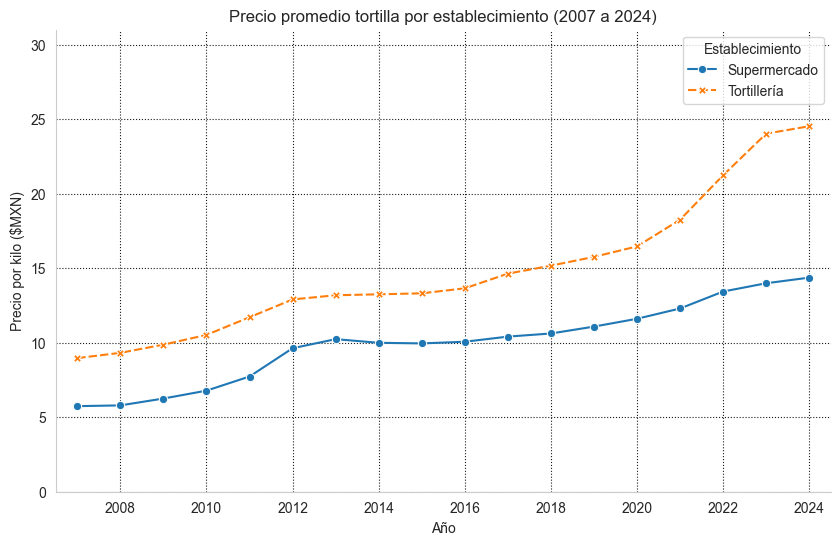

In [74]:
# Gráfica del precio promedio por año y tipo de establecimiento
plt.figure(figsize=(10,6))
sns.set_style("whitegrid", {"grid.color": ".1", "grid.linestyle": ":"})
gtortilla = sns.lineplot(data = precio_tortilla_año_establecimiento, x = 'Año',
                 y = 'Precio', hue = 'Establecimiento', style = 'Establecimiento',
                 markers=True)
gtortilla.set_xlim(2006.5, 2024.5)
gtortilla.set_ylim(0, 31)
gtortilla.set(title="Precio promedio tortilla por establecimiento (2007 a 2024)", ylabel="Precio por kilo ($MXN)")
sns.despine()


In [80]:
precio_tortilla_año_establecimiento_ancho = df_precio_tortilla.groupby(['Establecimiento','Año'])['Precio'].mean().to_frame().reset_index().pivot(index='Año', columns='Establecimiento', values='Precio')

# Cambio porcentual anual del precio de las tortillas
dif_porcentual = precio_tortilla_año_establecimiento_ancho.pct_change(1).loc[2008:2023]*100
dif_porcentual

Establecimiento,Supermercado,Tortillería
Año,,
2008,0.879063,3.931390
2009,7.946499,5.889783
2010,8.457905,6.647938
2011,13.977741,11.248697
2012,24.557275,10.210155
2013,6.325028,2.175052
2014,-2.386285,0.478425
2015,-0.406690,0.501384
2016,1.122792,2.513789


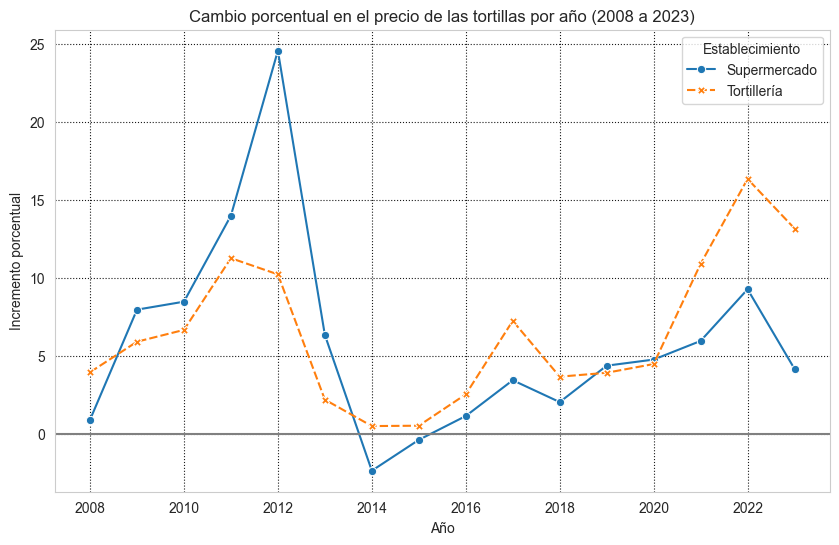

In [82]:
# Gráfica del incremento en el precio de las tortillas por año
plt.figure(figsize=(10,6))

g = sns.lineplot(dif_porcentual, markers=True)
g.set(title="Cambio porcentual en el precio de las tortillas por año (2008 a 2023)", ylabel="Incremento porcentual")
plt.axhline(y=0,color="gray")

plt.show()

##### _La mayor variación en el precio de la tortilla fue en 2011. Esto se debió a que, a principios de año, una fuerte helada afectó la producción de maíz en Sinaloa, considerado el granero de la república, así como una fuerte sequía en los estados del norte del país. Ese mismo año, México llegó a presentar un aumento del 70% en la importación de maíz, lo cual representó el 38.4% del maíz importado en América Latina._

[Veáse](https://www.jornada.com.mx/2011/12/08/economia/029n1eco)

In [141]:
mexico_map = gpd.read_file("/home/battle_beast/Git/2023_1_00_ENT/2023_1_00_ENT.shp")

In [143]:
mexico_map = mexico_map.rename(columns={"NOMGEO": "Estado"})

In [153]:
mexico_map

,CVEGEO,CVE_ENT,Estado,geometry
0,01,01,Aguascalientes,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,"MULTIPOLYGON (((-91.95650 20.19700, -91.95636 ..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((-102.31549 29.88000, -102.31509 29.8..."
5,06,06,Colima,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
6,07,07,Chiapas,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
7,08,08,Chihuahua,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
8,09,09,Ciudad de México,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
9,10,10,Durango,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


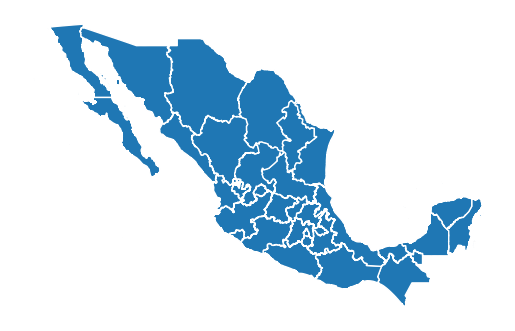

In [279]:
mapita=mexico_map.plot()
mapita.axis("off")
# Ocultar los bordes del eje
mapita.set_frame_on(False)

In [235]:
# Agrupamos por estado, año y establecimiento
precio_tortilla_estado_año = df_precio_tortilla.groupby(["Estado","Establecimiento","Año"])["Precio"].mean().to_frame().reset_index()

In [350]:
df_2024 = precio_tortilla_estado_año.query("Año == 2024").drop("Año", axis=1).reset_index(drop=True)
df_2024

,Estado,Establecimiento,Precio
0,Aguascalientes,Supermercado,13.737632
1,Aguascalientes,Tortillería,21.634211
2,Baja California,Supermercado,14.668947
3,Baja California,Tortillería,28.148816
4,Baja California Sur,Supermercado,13.743158
...,...,...,...
59,Veracruz de Ignacio de la Llave,Tortillería,22.449386
60,Yucatán,Supermercado,13.428684
61,Yucatán,Tortillería,27.860000
62,Zacatecas,Supermercado,13.373421


In [237]:
# Obtenemos el promedio del precio de las tortillas para lo que va del 2024
precio_tortilla_2024_supermercado = precio_tortilla_estado_año.query("Año == 2024 & `Establecimiento`=='Supermercado'").drop(["Año","Establecimiento"], axis=1).reset_index(drop=True)
precio_tortilla_2024_tortilleria = precio_tortilla_estado_año.query("Año == 2024 & `Establecimiento`=='Tortillería'").drop(["Año","Establecimiento"], axis=1).reset_index(drop=True)

In [286]:
# Hacemos right join con nuestro .shp de la República Mexicana
mapa_2024_supermercado = pd.merge(mexico_map, precio_tortilla_2024_supermercado, on = "Estado", how = "left")

In [317]:
precio_tortilla_2024_supermercado.describe()

,Precio
count,32.000000
mean,14.166665
std,1.089528
min,12.502368
25%,13.438947
50%,13.928224
75%,14.480867
max,17.995789


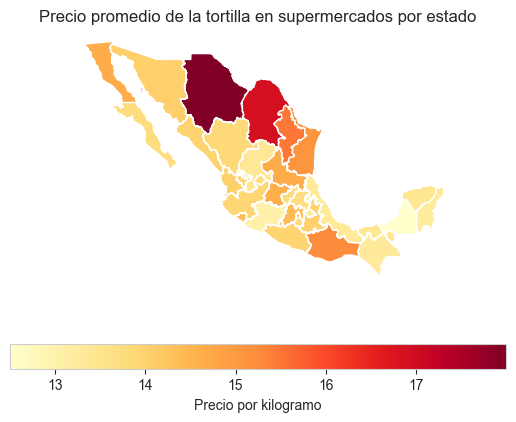

In [305]:
# Graficamos el valor de las tortillas por estado en supermercados durante el 2024
plt = mapa_2024_supermercado.plot(column = 'Precio', cmap = 'YlOrRd',
               legend = True, legend_kwds = {'label': 'Precio por kilogramo', 'orientation' : 'horizontal'})
plt.set_title('Precio promedio de la tortilla en supermercados por estado')
plt.axis("off")
plt.set_frame_on(False)

In [321]:
precio_tortilla_2024_tortilleria.describe()

,Precio
count,32.000000
mean,23.960964
std,3.046791
min,16.956316
25%,22.337039
50%,24.225658
75%,26.000000
max,29.514276


In [309]:
mapa_2024_tortilleria = pd.merge(mexico_map, precio_tortilla_2024_tortilleria, on = "Estado", how = "left")

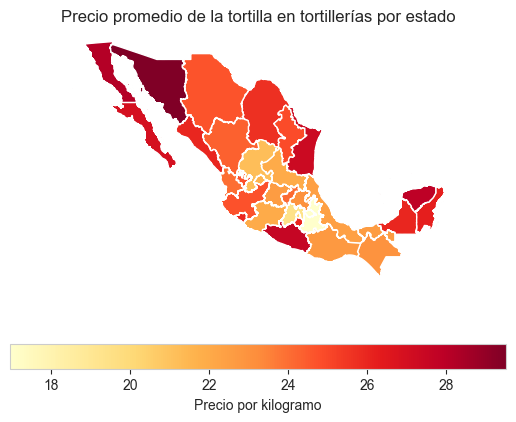

In [311]:
# Graficamos el valor de las tortillas por estado en tortillerías durante el 2024
plt = mapa_2024_tortilleria.plot(column = 'Precio', cmap = 'YlOrRd',
               legend = True, legend_kwds = {'label': 'Precio por kilogramo', 'orientation' : 'horizontal'})
plt.set_title('Precio promedio de la tortilla en tortillerías por estado')
plt.axis("off")
plt.set_frame_on(False)

In [384]:
# Paso 1: Filtrar el DataFrame por tipo de establecimiento
tortilleria_df = df_2024[df_2024['Establecimiento'] == 'Tortillería']
supermercado_df = df_2024[df_2024['Establecimiento'] == 'Supermercado']

# Paso 2: Calcular el promedio de precios por estado para cada tipo de establecimiento
tortilleria_promedio_por_estado = tortilleria_df.groupby('Estado')['Precio'].mean()
supermercado_promedio_por_estado = supermercado_df.groupby('Estado')['Precio'].mean()

# Paso 3: Calcular el índice de relación de precios
price_ratio_index = tortilleria_promedio_por_estado / supermercado_promedio_por_estado

df_index = pd.DataFrame({'Price Ratio Index': price_ratio_index}).reset_index()

df_index

,Estado,Price Ratio Index
0,Aguascalientes,1.574814
1,Baja California,1.918939
2,Baja California Sur,1.964614
3,Campeche,2.079606
4,Chiapas,1.730337
5,Chihuahua,1.372711
6,Ciudad de México,1.404171
7,Coahuila de Zaragoza,1.520892
8,Colima,1.809325
9,Durango,1.757952


In [392]:
mapa_index = pd.merge(mexico_map, df_index, on = "Estado", how = "left")

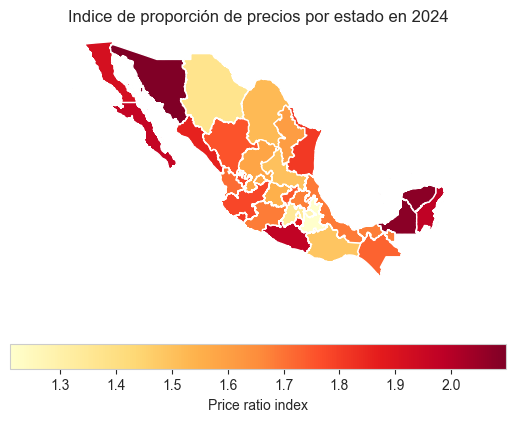

In [398]:
# Graficamos el valor de las tortillas por estado en tortillerías durante el 2024
plt = mapa_index.plot(column = 'Price Ratio Index', cmap = 'YlOrRd',
               legend = True, legend_kwds = {'label': 'Price ratio index', 'orientation' : 'horizontal'})
plt.set_title('Indice de proporción de precios por estado en 2024')
plt.axis("off")
plt.set_frame_on(False)